In [7]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

from salishsea_tools import viz_tools

%matplotlib inline

In [8]:
def get_files(run, base_dir, grid_dir, grid_type):
    
    fname = glob.glob(os.path.join(bas_dir, run,'*{}.nc'.format(grid_type)))[0]
    f = nc.Dataset(fname)
    
    mesh_mask = nc.Dataset(os.path.join(grid_dir,'mesh_mask.nc'))
    
    return f, mesh_mask

In [19]:
b = 'base_aug'
sufs = ['', '_noHoll', '_enst', '_eng']
runs = ['{}{}'.format(b, suf) for suf in sufs]
bas_dir = '/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6/mixing_paper/'
grid_dir = '/data/nsoontie/MEOPAR/2Ddomain/grid/'

In [20]:
fUs = {}
fWs = {}
fVs={}
meshs = {}

for run in runs:
    fUs[run], meshs[run] = get_files(run, bas_dir, grid_dir, 'grid_U')
    fWs[run], meshs[run] = get_files(run, bas_dir, grid_dir, 'grid_W')
    fVs[run], meshs[run] = get_files(run, bas_dir, grid_dir, 'grid_V')

In [21]:
def calculate_average_KE(u, v, mesh_mask,):
    tmask = mesh_mask.variables['tmask'][...,1:,1:]
    e3t = mesh_mask.variables['e3t_0'][...,1:,1:]
    e1t = mesh_mask.variables['e1t'][...,1:,1:]
    e2t = mesh_mask.variables['e2t'][...,1:,1:]
    print(e2t.shape,tmask.shape)
    
    umask = mesh_mask.variables['umask'][:] + np.zeros(u.shape)
    vmask = mesh_mask.variables['vmask'][:] + np.zeros(v.shape)
    
    um = np.ma.array(u,mask=1-umask)
    vm = np.ma.array(v,mask=1-vmask)
    
    us, vs = viz_tools.unstagger(um,vm)
    
    KE = us**2 + vs**2
    volume = np.sum(tmask*e3t*e2t*e1t)
    print(run, volume)
    KE_vol = KE*e3t*e2t*e1t*tmask
    KEavg =np.sum(np.sum(np.sum(KE_vol, axis=-1),axis=-1),axis=-1)/volume
    
    return KEavg

In [22]:
KE_avgs = {}
KEs = {}

for run in runs:
    v = fVs[run].variables['vomecrty'][:]
    u = fUs[run].variables['vozocrtx'][:]
    KE_avgs[run] = calculate_average_KE(u,v, meshs[run])

(1, 9, 1099) (1, 40, 9, 1099)
base_aug 396128361845.0
(1, 9, 1099) (1, 40, 9, 1099)
base_aug_noHoll 396128361845.0
(1, 9, 1099) (1, 40, 9, 1099)
base_aug_enst 396128361845.0
(1, 9, 1099) (1, 40, 9, 1099)
base_aug_eng 396128361845.0


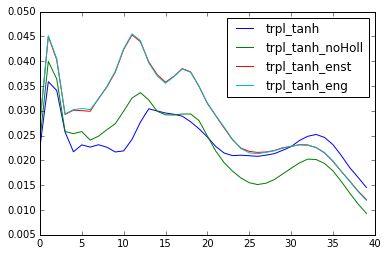

In [13]:
for run in runs:
    plt.plot(KE_avgs[run][:] ,label=run)
plt.legend(loc=0)

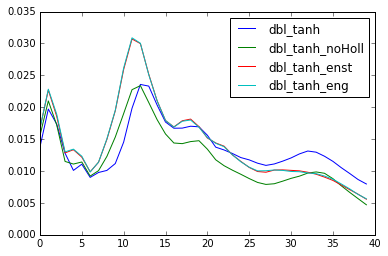

In [18]:
for run in runs:
    plt.plot(KE_avgs[run][:] ,label=run)
plt.legend(loc=0)

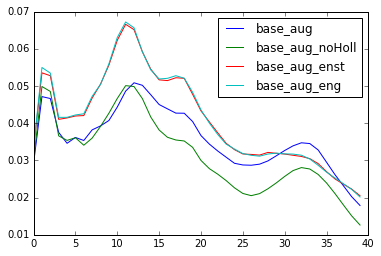

In [23]:
for run in runs:
    plt.plot(KE_avgs[run][:] ,label=run)
plt.legend(loc=0)